In [3]:
function collatz(n) # unproven: always terminates
    k = 0
    while n > 1
        n = isodd(n) ? 3n+1 : n>>1
        k += 1
    end
    return k
end

collatz (generic function with 1 method)

In [4]:
collatz(13254235457)


326

In [5]:
for i = 2:1:100
    α = collatz(i)
    if α > 300
        println("$i = $α")
    end
end

In [6]:
@time for i = 1:1e6 collatz(18) end

elapsed time: 0.040757588 seconds (96 bytes allocated)


In [7]:
@code_native collatz(123)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[3]
Source line: 7
	push	RBP
	mov	RBP, RSP
	xor	EAX, EAX
	cmp	RDI, 2
	jge	2
Source line: 7
	pop	RBP
	ret
Source line: 4
	test	DIL, 1
	jne	8
	sar	RDI
	jmpq	5
	lea	RDI, QWORD PTR [RDI + 2*RDI + 1]
Source line: 5
	inc	RAX
	cmp	RDI, 1
	jg	-36
	jmpq	-43


In [8]:
function mandel(z)
    c = z
    maxiter = 80
    for n = 1:maxiter
        if abs(z) > 2
            return n-1
        end
        z = z^2 + c
    end
    return maxiter
end

mandel (generic function with 1 method)

In [10]:
# Returns the number of iterations a points takes to go to infite on a mandelbrot set
function mandel_pt(c, MAX_ITER=100)
    iter = 0
    z    = 0
    while (iter < MAX_ITER)
        z = z^2 + c
        iter+= 1
        if abs(z) > 2.0
            return iter
        end
    end
    100
end;

In [11]:
# Return the Mandelbrot set by mapping each point to the corresponding number of iterations
mandel(zmin, zmax, resolution=1000) =
    [ mandel_pt(complex(j, i)) for i=linspace(zmin.im, zmax.im, resolution), j=linspace(zmin.re, zmax.re, resolution) ];

In [12]:
# The complex plane to map
(zmin, zmax) = (-2.2-1.5im, +1.2+1.5im)

# The Mandelbrot set
mandel_set = mandel(zmin, zmax);

In [13]:
mandel_set


1000x1000 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1

In [17]:
@which plot()

plot(args...) at /Users/guggisberg/.julia/v0.3/PyPlot/src/PyPlot.jl:367

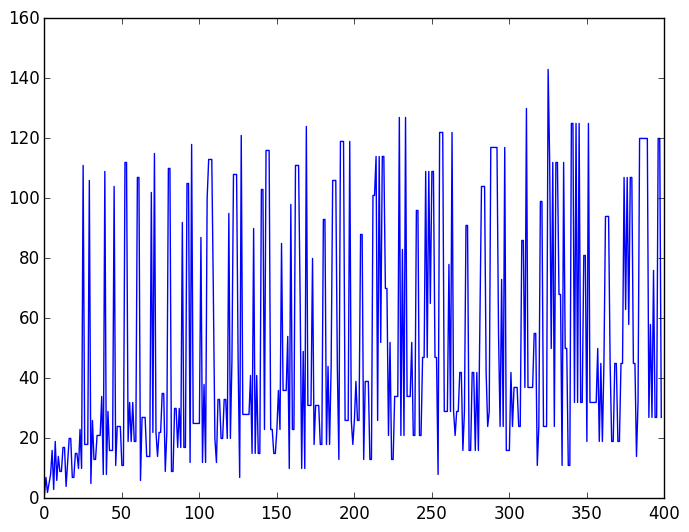

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11803b110>

In [18]:
y = [collatz(i) for i in 2:400]
plot(y)

INFO: Loading help data...


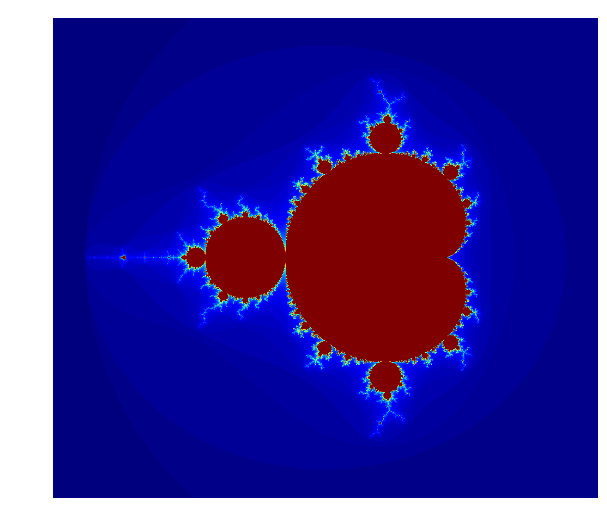

In [16]:
# import basic library
using PyPlot;


# Auxiliary function to map the complex rectagle to an array
to_extent(zmin, zmax) = [zmin.re, zmax.re, zmin.im, zmax.im]

# Plot it
axis("off")
imshow(mandel_set, extent=to_extent(zmin, zmax));

In [40]:
# The complex plane to map
(zmin, zmax) = (-0.676+0.005im, +1.076+0.405im)


# The Mandelbrot set
mandel_set = mandel(zmin, zmax);


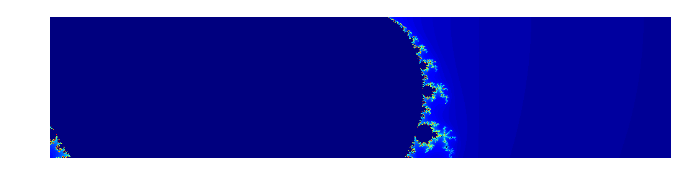

In [41]:
# import basic library
using PyPlot;


# Auxiliary function to map the complex rectagle to an array
to_extent(zmin, zmax) = [zmin.re, zmax.re, zmin.im, zmax.im]

# Plot it
axis("off")
imshow(mandel_set, extent=to_extent(zmin, zmax));

In [4]:
y = [i*i for i in 1:5]

5-element Array{Int64,1}:
  1
  4
  9
 16
 25

In [3]:
function collatz2d(n,a) # unproven: always terminates
    k = 0
    while n > 1 && k < 50
        n = isodd(n) ? a*n+1 : n>>1
        k += 1
    end
    return k
end

collatz2d (generic function with 1 method)

In [19]:
collatz2d(13,5)


300

In [65]:
collatzset(nmax, amax) =
[ collatz2d(j, i) for i in 111001:2:113001, j=111001:112001 ];

In [66]:
collatzmap = collatzset(428,853)

1001x1001 Array{Int64,2}:
 11   7  17  12  13  17   7  16  13  …   7   7  13  11  10  15   7  22  13
  7  27  18   7  11  10  11  18  11      7  15  12   7  15  11   8  23   8
 11   8  11  18   7   7   9  19  11     23  11  12  11  17   7  13  20   8
 18  10   7  22  19  20  13  20  18     20  27   7  24  10  17  12  22  22
 25  11  21  15  13  12  19  26   9     14  11  20  30  11  22  27  23  22
  9  13   8   7   7  11  11  19   7  …  12  17  10   7   7   8   9  24   7
 17  12   7  17   8  26   7  14  10      9   9   7  13  10  15   7  28  26
 17   7   8  23   8   7   8  14  17     14   7  15  10  14   7  16  17  22
  7   7  12  21   9  12  17  18  10     12   7  11  25  10  14  15  21   9
 14  11   7   7  11  18   9  20  13     15  17   7   7  18  11  22  28  20
  7   8  14  16   7   7  17  15   9  …   7  18  19  10   7   7   8  17  10
  7  19   7  16   7  11   7  17  14      7  14  17  11   7  11   7  14  10
 22  12   7  14   7  12  14  19  17     10  10   7  14   7  15  12  21   7

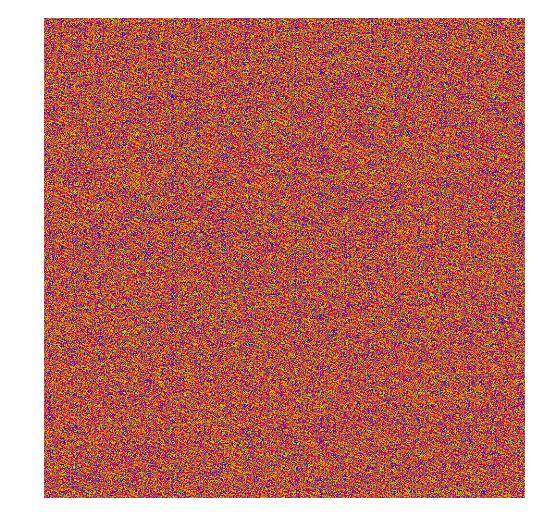

In [81]:
# import basic library
using PyPlot;


# Auxiliary function to map the complex rectagle to an array
to_extent(zmin, zmax) = [zmin.re, zmax.re, zmin.im, zmax.im]

# Plot it
axis("off")
imshow(collatzmap, extent=[1,100,1,100],cmap="prism");

In [69]:
plot:: mpl_examples/pylab_examples/image_demo.py


LoadError: mpl_examples not defined
while loading In[69], in expression starting on line 1

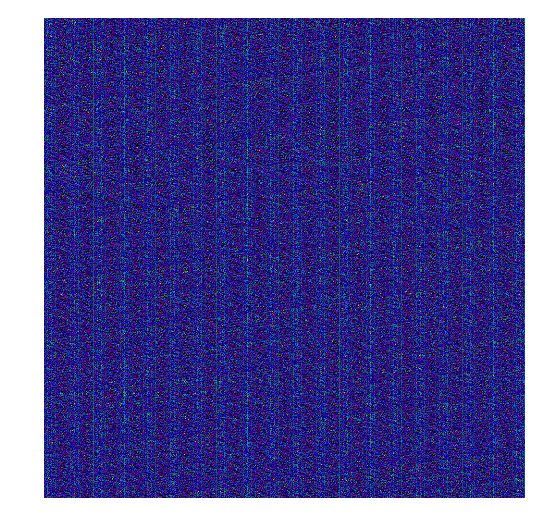

In [83]:
# import basic library
using PyPlot;


# Auxiliary function to map the complex rectagle to an array
to_extent(zmin, zmax) = [zmin.re, zmax.re, zmin.im, zmax.im]

# Plot it
axis("off")
imshow(collatzmap, extent=[1,100,1,100],cmap="spectral");

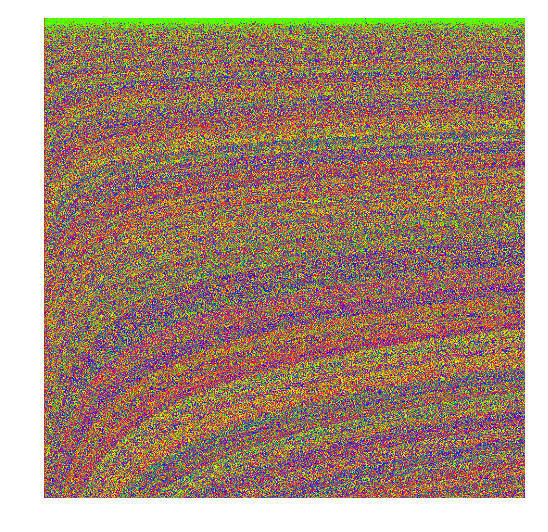

In [8]:
using PyPlot;
collatzset2(nmax, amax) =
[ collatz2d(j, i) for i in 1:2:nmax, j=1:2:amax];
cm = collatzset2(2000,2000)


axis("off")
imshow(cm, extent=[1,100,1,100],cmap="prism");